<a href="https://colab.research.google.com/github/harsh24895/pyTorch/blob/main/PyTorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pyTorch WorkFlow

In [2]:
import torch
from torch import nn ## nn contains all of Pytorch building block for neural networks
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'2.3.1+cu121'

#1.Data( Preparing and loading )

In [4]:
#Machine learning has two parts:
#1.to get into the numberical representation as a Number
#2.Build to model to learn patterns in that numberical reperesentation


#create a known parameters for linear regression that would be the (Y = a + bX)
weight = 0.6 #this is the b as per formula above line
bias = 0.3 #and this would be a for now for formula above line

start = 0
end = 1
step = 0.02 #this step is between the start and end
X =  torch.arange(start,end,step).unsqueeze(dim=1) #here is X is capital represent the Matrix or Tensor is it's smaller then it represent vector4
#also here we have mention the start,end, step so in the output you would not it would step after each 0.02 value  and unsqueeze means it will add the dimension with the brackets
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3120],
         [0.3240],
         [0.3360],
         [0.3480],
         [0.3600],
         [0.3720],
         [0.3840],
         [0.3960],
         [0.4080]]))

In [5]:
len(X),len(y)

(50, 50)

#Splitting data into training and test set(important concept in the machine learning

In [6]:
#create a train/test split
# here we are setting 35 samples in test from 0.7 and rest would be the model will train/Predict and it would be 15 out of 50
train_sp = int(0.7 * len(X))
X_train, y_train = X[:train_sp],y[:train_sp]
X_test, y_test = X[train_sp:],y[train_sp:]

len(X_train), len(y_train), len(X_test), len(y_test)


(35, 35, 15, 15)

In [7]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800]]),
 tensor([[0.3000],
         [0.3120],
         [0.3240],
         [0.3360],
         [0.3480],
         [0.3600],
         [0.3720],
         [0.3840],
         [0.3960],
         [0.4080],
         [0.4200],
         [0.4320],
         [0.4440],
         [0.4560],
         [0.4680],
         [0.4800],
         [0.4920],
         [

In [8]:
#we need to visual the data in a proper way
def plot_predict(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions=None):

  """
  Plot training data, test data and compares prediction
  """
  plt.figure(figsize=(10,8))

  #Plot training data in blue
  # also here c stands for colour and b is blue and s stands for the size and later would be the label for the graph.
  plt.scatter(train_data, train_labels, c = "b", s=4, label="Traing data" )

  #Plot the testing data in Green
  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing data")


  #now we are looking for predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s=4, label="predictions")

  #show the legend it would show the lables on matpotlib
  #here prop stands for properties
  plt.legend(prop={"size":14})


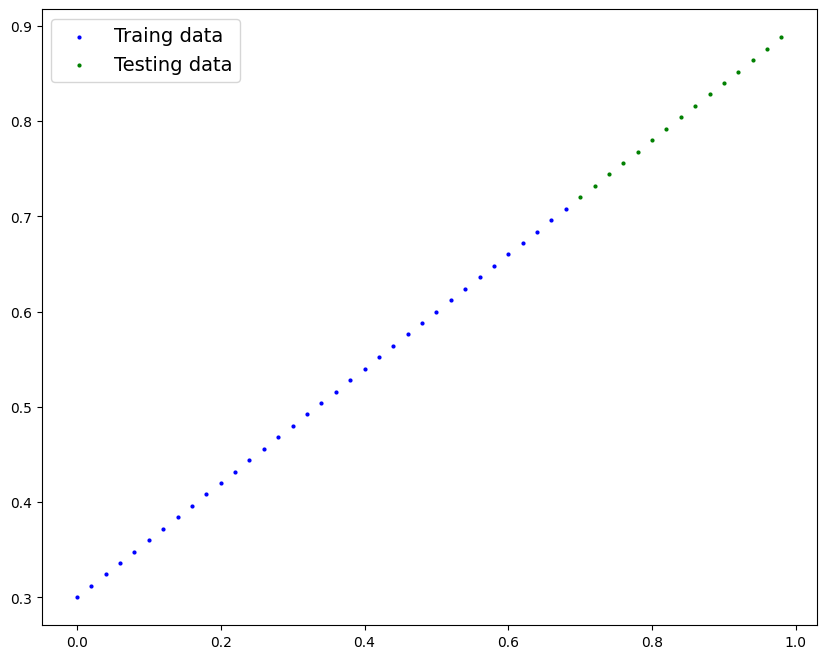

In [31]:
#run the code
plot_predict();

# and here we build a traing and testing model

#Building first Pytorch model



In [38]:
#Create a linear regression model class
class LinearRegrationModel(nn.Module): # it will inherit from nn module and it's a parent class of pytorch
  def __int__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #this will start with random weight and try to adjust it to ideal weight
                                            requires_grad=True,#this parameter updated via gradient descent?
                                            dtype=torch.float)) #it will always use default datatype float32

    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

    #this method will define the computation model
    # it will take parameter input x as train data
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias #this is linear regression formula


# This model will look at training data and adjust the random values to better represent or get closer result of weight and bias.
# To workout this we need to use the algorithms : Gradient descent and Backpropagation
#also to keep in mind pytorch has already added this two algrorithm in the backend
#need to make sure that any time we uses nn.module it required the def forward method to fetch *************************Important********************************

In [11]:
## Pytorch model building essentails
#torch.nn - contains all of the building of computational graph
#torch.nn.Parameter-
#torch.nn.module-
#torch.optim-
#def forward()- this is only method that will do the computation in the model

In [24]:
torch.randn(1)

tensor([1.1918])

#checking the content of Pytorch model

In [44]:

#we can check the model what inside the parameter is .parameters().
torch.manual_seed(42)

#create a instance of the model
model1 = LinearRegrationModel()

#check the parameters
list(model1.parameters())


[]